1. Normal distribution deviation
==

One cool thing about normal distributions is that for every single one, the same percentage of the data is within one standard deviation of the mean, the same percentage is within two standard deviations of the mean, and so on.

About 68% of the data is within one standard deviation, roughly 95% is within two standard deviations, and about 99% is within three standard deviations.

This helps us quickly understand where values fall within the data set, as well as how typical or unusual they are.

In [59]:
# Housefly wing lengths in millimeters
wing_lengths = [36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 
                42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 
                44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46,
                46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47,
                47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 
                50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55]

# centrality variables
mean = sum(wing_lengths) / len(wing_lengths)
variances = [(i - mean) ** 2 for i in wing_lengths]
variance = sum(variances)/ len(variances)
standard_deviation = variance ** (1/2)

In [61]:
# distance to mean in standard deviation unit
standard_deviations = [(i - mean)/standard_deviation for i in wing_lengths]

In [126]:
def within_percentage(deviations, count):
    within = [i for i in deviations if -count <= i <= count]
    count = len(within)
    return count / len(deviations)

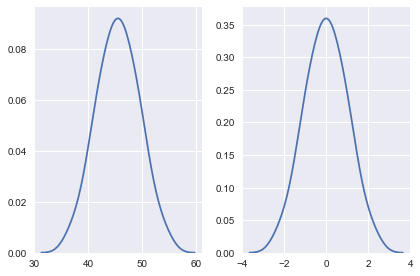

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a subfigure (1 row and 2 columns)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,4))

# histogram of wing_lengths
sns.kdeplot(wing_lengths, ax=ax1)

# histogram of wing_lengths considering standard deviations
sns.kdeplot(standard_deviations, ax=ax2)

f.tight_layout()
plt.show()

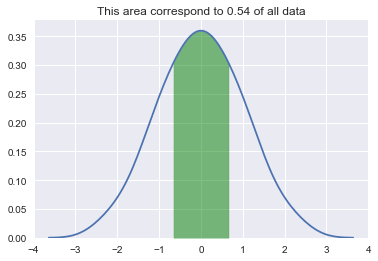

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# configure size of figure
sns.set(rc={'figure.figsize':(6,4)})

# How many elements are in [-X std unit, X std unit] of mean
distance = 0.6745
percentage = within_percentage(standard_deviations,distance)

# histogram of wing_lengths using standard_deviations
ax = sns.kdeplot(standard_deviations)

# get x & y points of histogram
x_points, y_points = ax.get_lines()[0].get_data()

# interval in standard deviations  
filter_ = np.logical_and(x_points >= -distance,x_points <= distance)

plt.fill_between(x_points[filter_], y_points[filter_],color='g',alpha=.5)
plt.title("This area correspond to " + str(percentage) + " of all data")
plt.show()

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. For each point in <span style="background-color: #F9EBEA; color:##C0392B">wing_lengths</span>, calculate the distance from the mean in number of standard deviations.
2. Calculate the proportion of the data that's within one standard deviation of the mean. Assign the result to <span style="background-color: #F9EBEA; color:##C0392B">within_one_percentage</span>.
3. Calculate the proportion of the data that's within two standard deviations of the mean. Assign the result to <span style="background-color: #F9EBEA; color:##C0392B">within_two_percentage</span>.
4. Calculate the proportion of the data that's within three standard deviations of the mean. Assign the result to <span style="background-color: #F9EBEA; color:##C0392B">within_three_percentage</span>.

2. Z-Score
==

Populating the interactive namespace from numpy and matplotlib


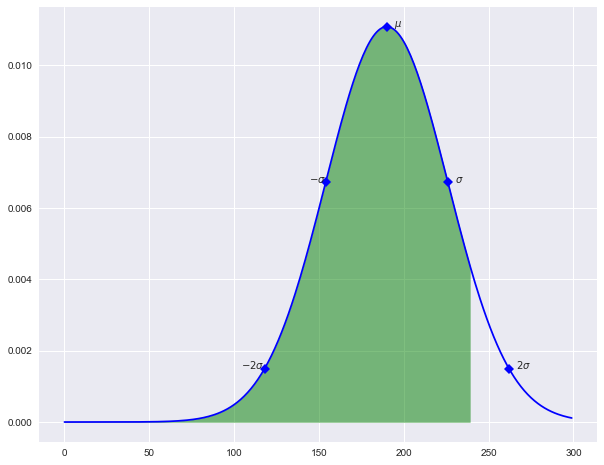

0.9175667301260455

In [37]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

## points under study
xi = 240
mean_facebook = 190
std_facebook = 36
axis_x = range(0,300)

## return the cumulative value from Z-Table
cdf = stats.norm.cdf(xi,mean_facebook, std_facebook)

## -2std, -std, std, 2std 
minus2std = mean_facebook - 2*std_facebook
minusstd = mean_facebook - std_facebook
plus1std = mean_facebook + std_facebook
plus2std = mean_facebook + 2*std_facebook

## mark points in the plot
markers_points = [minus2std, minusstd, mean_facebook, plus1std, plus2std]

## find the probability distribution function
pdf = stats.norm.pdf(axis_x,mean_facebook,std_facebook)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf, '-bD',markevery=markers_points)
plt.annotate('$\mu$',xy=(mean_facebook+4,pdf[mean_facebook]))
plt.annotate('$-2\sigma$',xy=(minus2std-14,pdf[minus2std]))
plt.annotate('$-\sigma$',xy=(minusstd-10,pdf[minusstd]))
plt.annotate('$\sigma$',xy=(plus1std+4,pdf[plus1std]))
plt.annotate('$2\sigma$',xy=(plus2std+4,pdf[plus2std]))

## The shaded area is cdf at xi, in other words, cdf[240] = 0.9175667301260455
plt.fill_between(axis_x[0:xi], pdf[0:xi],color='g',alpha=.5)

plt.show()

cdf
